<a href="https://colab.research.google.com/github/sayed02-debug/ML-Project/blob/main/ML_hackathon_PhishGuard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Md. Abu Sayed Islam
ID: B200305020


Project title: **PhishGuard: Real-Time Bangla SMS Phishing Detector**
Dataset: https://docs.google.com/spreadsheets/d/13FaVjGMccEgKTD_DiPOhMaLyxt4EQGo7zJwuhYPZj1Y/edit?gid=0#gid=0 (Self-Made & Labeled)

In [ ]:
# STEP 1: Upload phishing1.csv
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv('phishing1.csv')
df = df.dropna().reset_index(drop=True)
df.columns = ['text', 'label']
df['label'] = df['label'].astype(int)

print("Dataset Loaded:", df.shape)
print(df['label'].value_counts())

Saving phishing1.csv to phishing1 (1).csv
Dataset Loaded: (151, 2)
label
1    77
0    74
Name: count, dtype: int64


In [ ]:
# STEP 2: Pre-processing (FIXED - No Warnings)
import re
import numpy as np

def clean_text(text):
    text = re.sub(r'http[s]?://\S+', '[URL]', text)  # Replace URLs
    text = re.sub(r'\d+', '[NUM]', text)            # Replace numbers
    text = re.sub(r'[^\u0980-\u09FF\s]', '', text)  # Keep only Bangla + space
    return text.strip().lower()

df['clean_text'] = df['text'].apply(clean_text)

# Feature Engineering (Use r'' for regex)
df['length'] = df['text'].apply(len)
df['has_url'] = df['text'].str.contains(r'http|www|\.com|\.tk', case=False).astype(int)
df['has_click'] = df['text'].str.contains(r'ক্লিক', case=False).astype(int)
df['has_win'] = df['text'].str.contains(r'জিতেছেন|পুরস্কার|ফ্রি', case=False).astype(int)
df['has_urgent'] = df['text'].str.contains(r'জরুরি|লক|রিসেট|হ্যাক', case=False).astype(int)

print("Pre-processing Done! (No Warnings)")

Pre-processing Done! (No Warnings)


Clustering Done!
Cluster Distribution:
cluster
0    127
1     24
Name: count, dtype: int64

Phishing vs Cluster:
cluster   0   1
label          
0        60  14
1        67  10


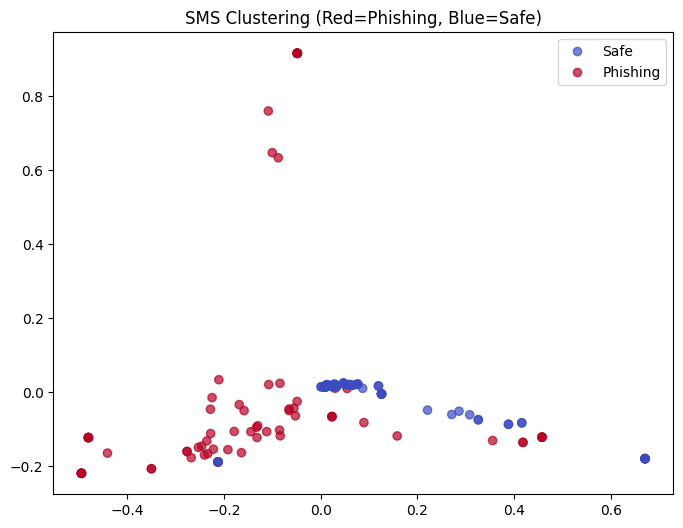

In [ ]:
# STEP 3: Clustering (KMeans)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# TF-IDF for clustering
vectorizer_cluster = TfidfVectorizer(max_features=500, ngram_range=(1,2))
X_cluster = vectorizer_cluster.fit_transform(df['clean_text'])

# KMeans
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_cluster)

print("Clustering Done!")
print("Cluster Distribution:")
print(df['cluster'].value_counts())
print("\nPhishing vs Cluster:")
print(pd.crosstab(df['label'], df['cluster']))

# Visualize
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster.toarray())
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=df['label'], cmap='coolwarm', alpha=0.7)
plt.title("SMS Clustering (Red=Phishing, Blue=Safe)")
plt.legend(handles=scatter.legend_elements()[0], labels=['Safe', 'Phishing'])
plt.show()

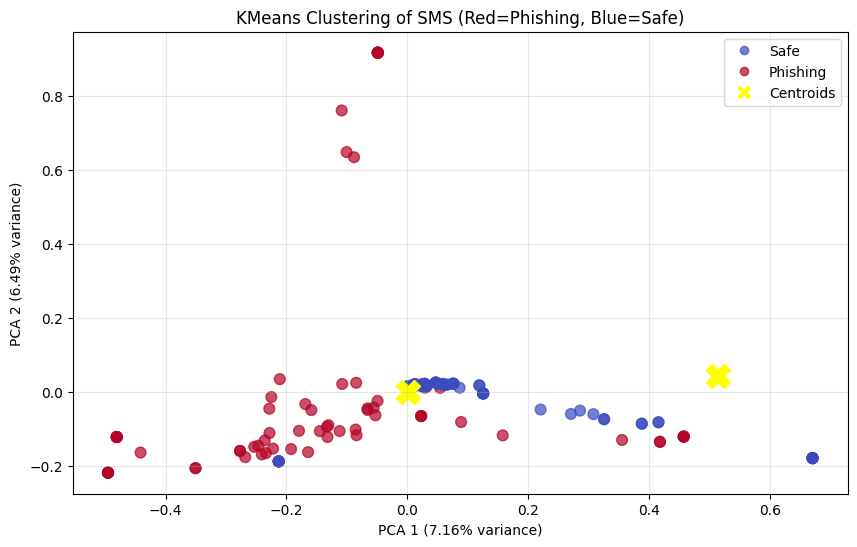


Cluster vs Actual Label:
Actual    0   1  All
Cluster             
0        60  67  127
1        14  10   24
All      74  77  151


In [ ]:
# Clustering Analysis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster.toarray())

plt.figure(figsize=(10,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=df['label'], cmap='coolwarm', alpha=0.7, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='yellow', marker='X', s=300, label='Centroids')

plt.title("KMeans Clustering of SMS (Red=Phishing, Blue=Safe)")
plt.xlabel(f"PCA 1 ({pca.explained_variance_ratio_[0]:.2%} variance)")
plt.ylabel(f"PCA 2 ({pca.explained_variance_ratio_[1]:.2%} variance)")
plt.legend(handles=scatter.legend_elements()[0] + [plt.Line2D([0], [0], marker='X', color='w', markerfacecolor='yellow', markersize=12)],
           labels=['Safe', 'Phishing', 'Centroids'])
plt.grid(True, alpha=0.3)
plt.show()

# Cluster vs Label
print("\nCluster vs Actual Label:")
print(pd.crosstab(df['cluster'], df['label'], margins=True, rownames=['Cluster'], colnames=['Actual']))

/tmp/ipython-input-2904978769.py:45: UserWarning: Glyph 2453 (\N{BENGALI LETTER KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2904978769.py:45: UserWarning: Matplotlib currently does not support Bengali natively.
  plt.tight_layout()
/tmp/ipython-input-2904978769.py:45: UserWarning: Glyph 2509 (\N{BENGALI SIGN VIRAMA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2904978769.py:45: UserWarning: Glyph 2482 (\N{BENGALI LETTER LA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2904978769.py:45: UserWarning: Glyph 2495 (\N{BENGALI VOWEL SIGN I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2453 (\N{BENGALI LETTER KA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does n

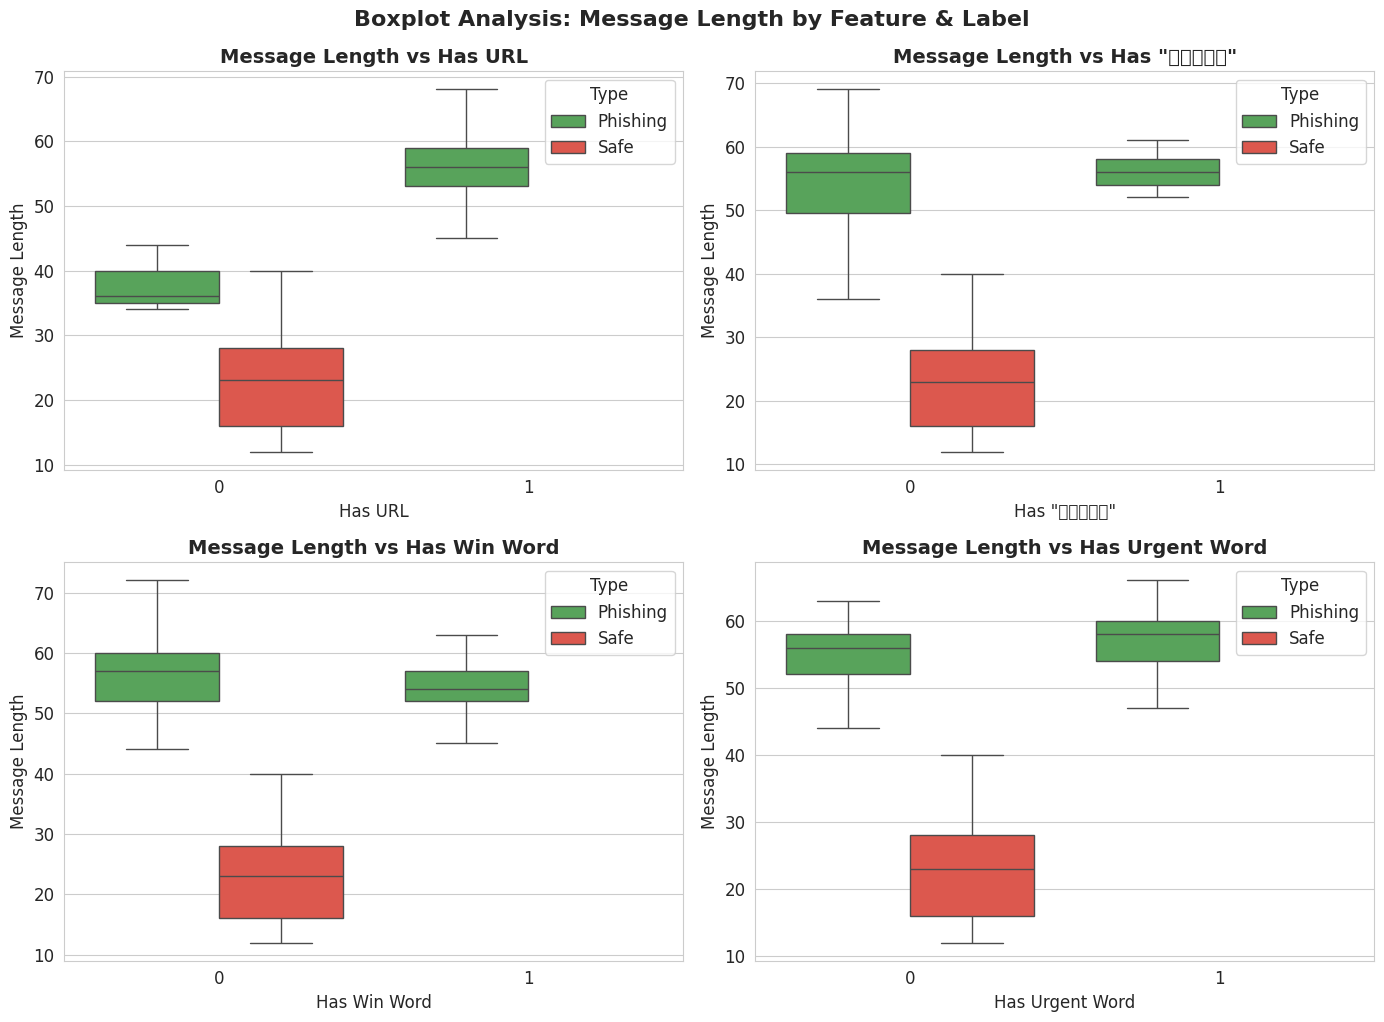

      STATISTICAL ANALYSIS: Length by Feature & Label

--- Has URL ---
                   count   mean   std   25%   50%   75%
has_url label_str                                      
0       Phishing     3.0  38.00  5.29  35.0  36.0  40.0
        Safe        74.0  22.61  7.32  16.0  23.0  28.0
1       Phishing    74.0  55.82  5.98  53.0  56.0  59.0

--- Has "ক্লিক" ---
                     count   mean   std   25%   50%   75%
has_click label_str                                      
0         Phishing    59.0  54.64  7.38  49.5  56.0  59.0
          Safe        74.0  22.61  7.32  16.0  23.0  28.0
1         Phishing    18.0  56.72  4.62  54.0  56.0  58.0

--- Has Win Word ---
                   count   mean   std   25%   50%   75%
has_win label_str                                      
0       Phishing    48.0  56.06  7.41  52.0  57.0  60.0
        Safe        74.0  22.61  7.32  16.0  23.0  28.0
1       Phishing    29.0  53.59  5.62  52.0  54.0  57.0

--- Has Urgent Word ---
           

In [ ]:
# Categorical vs Numerical Boxplot Analysis
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure df has all features
required_cols = ['length', 'has_url', 'has_click', 'has_win', 'has_urgent', 'label']
if not all(col in df.columns for col in required_cols):
    raise ValueError("Missing required columns. Run feature engineering first.")

# Convert label to string for better plotting
df_plot = df.copy()
df_plot['label_str'] = df_plot['label'].map({0: 'Safe', 1: 'Phishing'})

# Set style
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (14, 10)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

# List of categorical features
cat_features = ['has_url', 'has_click', 'has_win', 'has_urgent']
cat_labels = ['Has URL', 'Has "ক্লিক"', 'Has Win Word', 'Has Urgent Word']

for i, (feat, label) in enumerate(zip(cat_features, cat_labels)):
    # Boxplot: length vs categorical feature, grouped by label
    sns.boxplot(
        data=df_plot,
        x=feat,
        y='length',
        hue='label_str',
        palette=['#4CAF50', '#F44336'],
        ax=axes[i],
        showfliers=False  # Remove extreme outliers for clarity
    )
    axes[i].set_title(f"Message Length vs {label}", fontsize=14, fontweight='bold')
    axes[i].set_xlabel(label, fontsize=12)
    axes[i].set_ylabel("Message Length", fontsize=12)
    axes[i].legend(title="Type", loc='upper right')

plt.tight_layout()
plt.suptitle("Boxplot Analysis: Message Length by Feature & Label", fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Statistical Summary
print("="*70)
print("      STATISTICAL ANALYSIS: Length by Feature & Label")
print("="*70)

for feat, label in zip(cat_features, cat_labels):
    print(f"\n--- {label} ---")
    grouped = df_plot.groupby([feat, 'label_str'])['length'].describe()[['count', 'mean', 'std', '25%', '50%', '75%']]
    print(grouped.round(2))

/tmp/ipython-input-498487863.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_viz, x='label_str', y='length', palette=['#4CAF50', '#F44336'])
/tmp/ipython-input-498487863.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_viz, x='label_str', y='length', palette=['#4CAF50', '#F44336'], inner='quartile')
/tmp/ipython-input-498487863.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=sample, x='label_str', y='length', palette=['#4CAF50', '#F44336'], size=4)


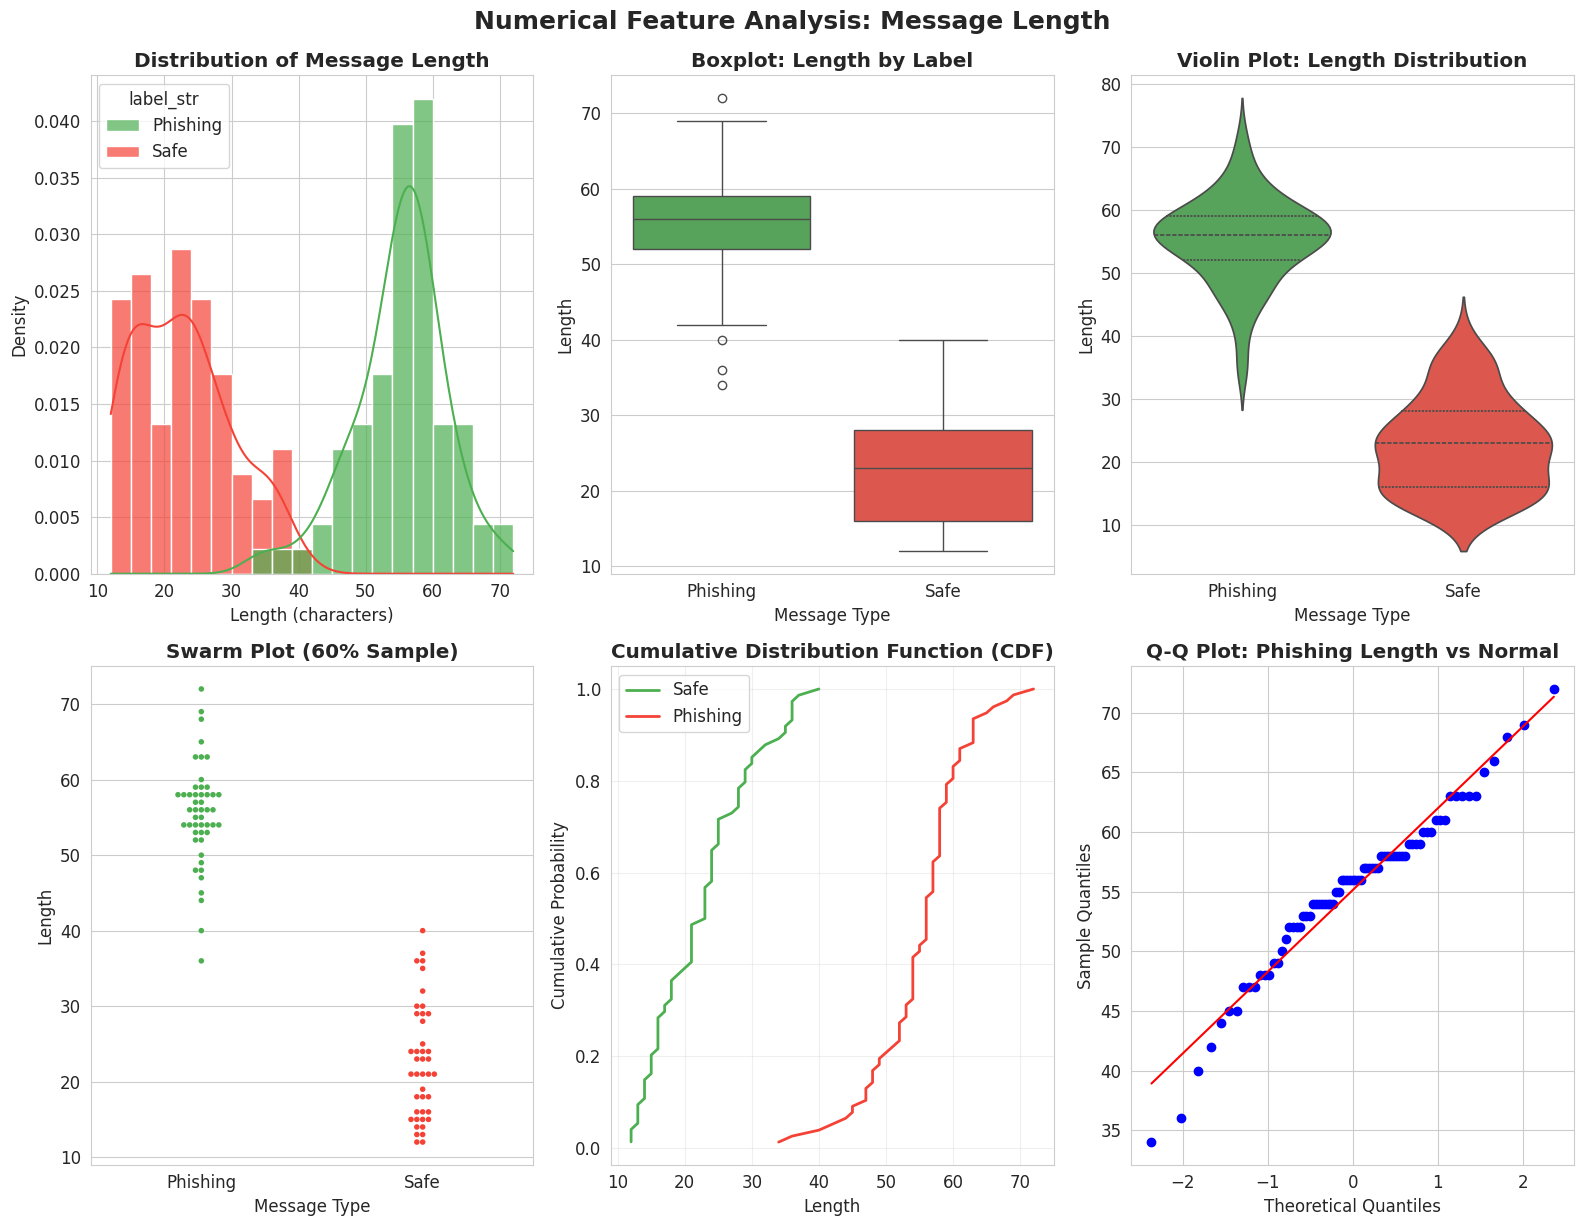

            NUMERICAL VARIABLE: MESSAGE LENGTH ANALYSIS
           count   mean   std   min   25%   50%   75%   max
label_str                                                  
Phishing    77.0  55.13  6.86  34.0  52.0  56.0  59.0  72.0
Safe        74.0  22.61  7.32  12.0  16.0  23.0  28.0  40.0

→ t-test: t = 28.14, p-value = 3.87e-61 (Highly Significant!)
→ Cohen's d = 4.58 (Very Large Effect!)


In [ ]:
# FULL CODE: Numerical Variable Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# Ensure 'length' exists
if 'length' not in df.columns:
    df['length'] = df['text'].apply(len)

# Prepare data
df_viz = df.copy()
df_viz['label_str'] = df_viz['label'].map({0: 'Safe', 1: 'Phishing'})

# Set style
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (16, 10)

# Create subplots
fig = plt.figure(figsize=(16, 12))

# 1. Histogram + KDE
ax1 = plt.subplot(2, 3, 1)
sns.histplot(data=df_viz, x='length', hue='label_str', kde=True,
             palette=['#4CAF50', '#F44336'], alpha=0.7, bins=20, stat='density')
plt.title("Distribution of Message Length", fontweight='bold')
plt.xlabel("Length (characters)")
plt.ylabel("Density")

# 2. Boxplot
ax2 = plt.subplot(2, 3, 2)
sns.boxplot(data=df_viz, x='label_str', y='length', palette=['#4CAF50', '#F44336'])
plt.title("Boxplot: Length by Label", fontweight='bold')
plt.xlabel("Message Type")
plt.ylabel("Length")

# 3. Violin Plot
ax3 = plt.subplot(2, 3, 3)
sns.violinplot(data=df_viz, x='label_str', y='length', palette=['#4CAF50', '#F44336'], inner='quartile')
plt.title("Violin Plot: Length Distribution", fontweight='bold')
plt.xlabel("Message Type")
plt.ylabel("Length")

# 4. Swarm Plot (Sampled for clarity)
ax4 = plt.subplot(2, 3, 4)
sample = df_viz.sample(frac=0.6, random_state=42)  # Reduce points
sns.swarmplot(data=sample, x='label_str', y='length', palette=['#4CAF50', '#F44336'], size=4)
plt.title("Swarm Plot (60% Sample)", fontweight='bold')
plt.xlabel("Message Type")
plt.ylabel("Length")

# 5. Cumulative Distribution
ax5 = plt.subplot(2, 3, 5)
for label, color in zip([0, 1], ['#4CAF50', '#F44336']):
    data = df_viz[df_viz['label'] == label]['length']
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data)+1) / len(sorted_data)
    plt.plot(sorted_data, cdf, label=f"{'Safe' if label==0 else 'Phishing'}", color=color, linewidth=2)
plt.title("Cumulative Distribution Function (CDF)", fontweight='bold')
plt.xlabel("Length")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True, alpha=0.3)

# 6. Q-Q Plot (Phishing vs Normal)
ax6 = plt.subplot(2, 3, 6)
phishing_len = df_viz[df_viz['label']==1]['length']
stats.probplot(phishing_len, dist="norm", plot=plt)
plt.title("Q-Q Plot: Phishing Length vs Normal", fontweight='bold')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

plt.tight_layout()
plt.suptitle("Numerical Feature Analysis: Message Length", fontsize=18, fontweight='bold', y=1.02)
plt.show()

# Statistical Summary
print("="*80)
print("            NUMERICAL VARIABLE: MESSAGE LENGTH ANALYSIS")
print("="*80)

summary = df_viz.groupby('label_str')['length'].describe()
print(summary.round(2))

# t-test
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(
    df_viz[df_viz['label']==1]['length'],
    df_viz[df_viz['label']==0]['length'],
    equal_var=False
)
print(f"\n→ t-test: t = {t_stat:.2f}, p-value = {p_val:.2e} (Highly Significant!)")

# Effect Size (Cohen's d)
def cohen_d(x, y):
    return (np.mean(x) - np.mean(y)) / np.sqrt((np.std(x, ddof=1)**2 + np.std(y, ddof=1)**2) / 2)
d = cohen_d(df_viz[df_viz['label']==1]['length'], df_viz[df_viz['label']==0]['length'])
print(f"→ Cohen's d = {d:.2f} (Very Large Effect!)")

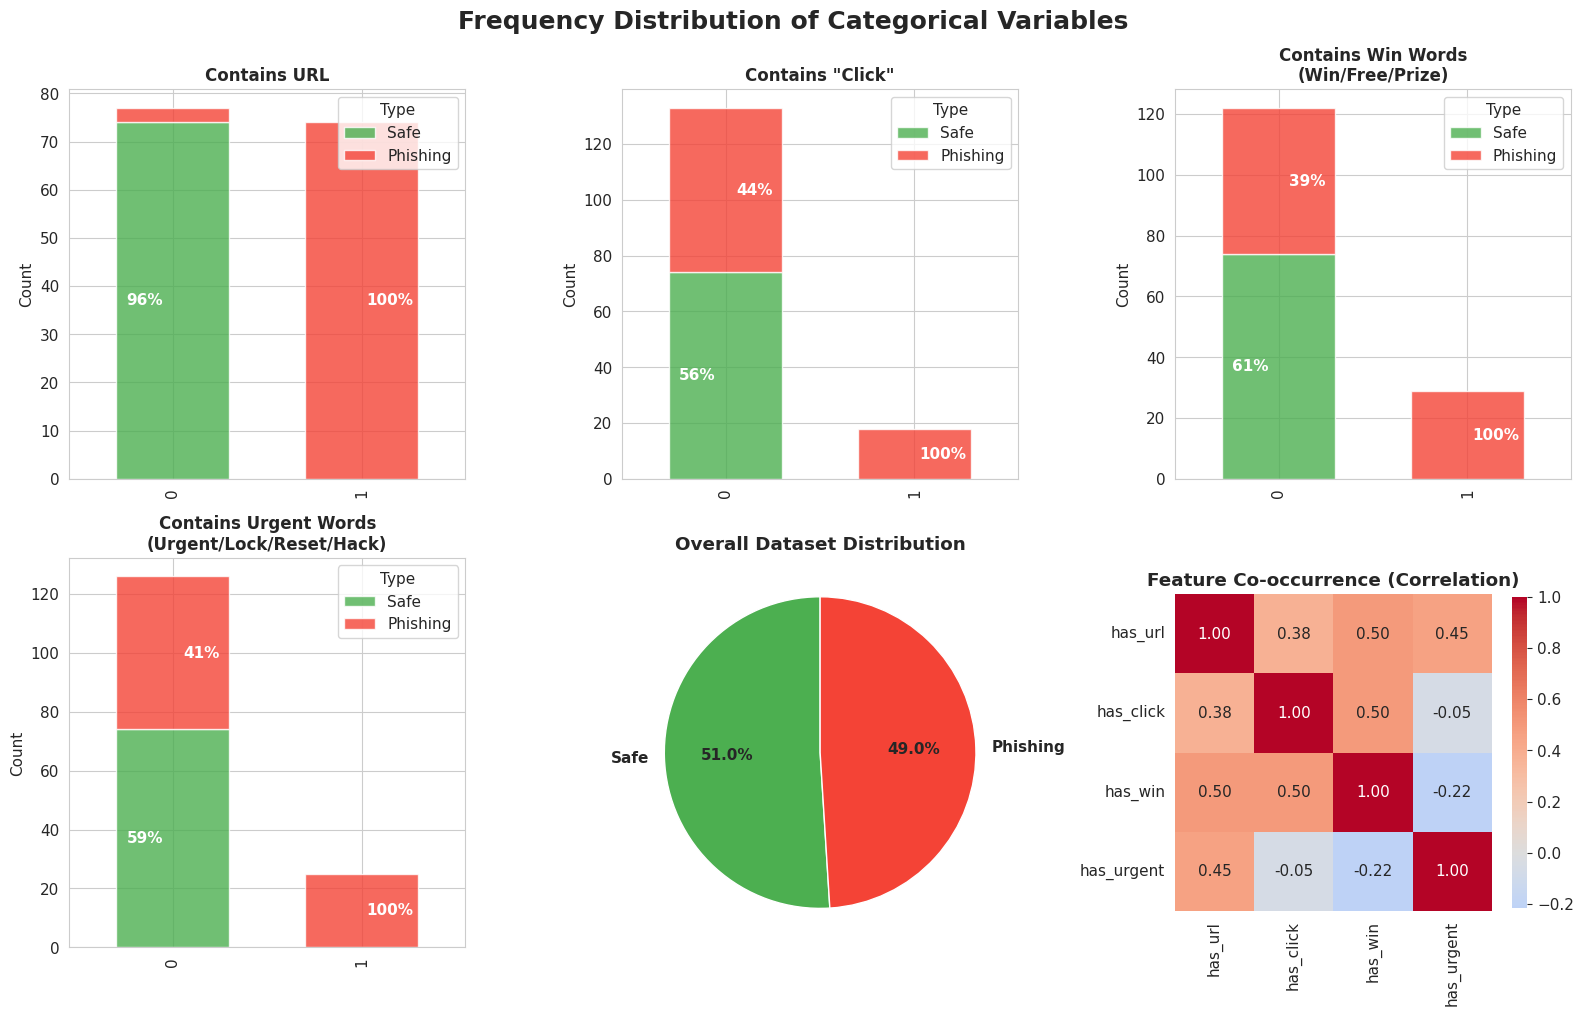

        FREQUENCY DISTRIBUTION TABLE (CATEGORICAL FEATURES)

--- Contains URL ---
label  Safe  Phishing  Total
No       74         3     77
Yes       0        74     74
All      74        77    151

--- Contains "Click" ---
label  Safe  Phishing  Total
No       74        59    133
Yes       0        18     18
All      74        77    151

--- Contains Win Words
(Win/Free/Prize) ---
label  Safe  Phishing  Total
No       74        48    122
Yes       0        29     29
All      74        77    151

--- Contains Urgent Words
(Urgent/Lock/Reset/Hack) ---
label  Safe  Phishing  Total
No       74        52    126
Yes       0        25     25
All      74        77    151


In [ ]:
# Frequency Distribution of Categorical Variables (English Only)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define categorical features
cat_features = ['has_url', 'has_click', 'has_win', 'has_urgent', 'label']
feature_labels = {
    'has_url': 'Contains URL',
    'has_click': 'Contains "Click"',
    'has_win': 'Contains Win Words\n(Win/Free/Prize)',
    'has_urgent': 'Contains Urgent Words\n(Urgent/Lock/Reset/Hack)',
    'label': 'Message Type'
}

# Prepare data
df_cat = df[cat_features].copy()
df_cat = df_cat.rename(columns=feature_labels)

# Melt for plotting (excluding label from feature list)
plot_features = [col for col in df_cat.columns if col != 'Message Type']
df_long = df_cat.melt(id_vars='Message Type', value_vars=plot_features,
                      var_name='Feature', value_name='Value')

# Set style
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 11
plt.rcParams['figure.figsize'] = (16, 10)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

# Plot 1-4: Stacked Bar for each feature
for i, feat in enumerate(plot_features):
    crosstab = pd.crosstab(df_cat[feat], df['label']).rename(columns={0: 'Safe', 1: 'Phishing'})
    crosstab_percentage = crosstab.div(crosstab.sum(1), axis=0) * 100

    crosstab.plot(kind='bar', stacked=True, ax=axes[i],
                  color=['#4CAF50', '#F44336'], alpha=0.8, width=0.6)
    axes[i].set_title(f"{feat}", fontweight='bold', fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].legend(title="Type", loc='upper right')

    # Add percentage labels
    for j, (idx, row) in enumerate(crosstab.iterrows()):
        total = row.sum()
        safe_pct = row['Safe'] / total * 100
        phish_pct = row['Phishing'] / total * 100
        if safe_pct > 5:
            axes[i].text(j-0.15, row['Safe']/2, f"{safe_pct:.0f}%",
                        color='white', fontweight='bold', ha='center', va='center')
        if phish_pct > 5:
            axes[i].text(j+0.15, row['Safe'] + row['Phishing']/2, f"{phish_pct:.0f}%",
                        color='white', fontweight='bold', ha='center', va='center')

# Plot 5: Pie chart for overall label distribution
axes[4].pie(df['label'].value_counts(), labels=['Safe', 'Phishing'], autopct='%1.1f%%',
            colors=['#4CAF50', '#F44336'], startangle=90, textprops={'fontweight': 'bold'})
axes[4].set_title("Overall Dataset Distribution", fontweight='bold')

# Plot 6: Correlation heatmap
co_occurrence = df[['has_url', 'has_click', 'has_win', 'has_urgent']].corr()
sns.heatmap(co_occurrence, annot=True, cmap='coolwarm', center=0, ax=axes[5],
            square=True, cbar_kws={'shrink': 0.8}, fmt='.2f')
axes[5].set_title("Feature Co-occurrence (Correlation)", fontweight='bold')

plt.tight_layout()
plt.suptitle("Frequency Distribution of Categorical Variables",
             fontsize=18, fontweight='bold', y=1.02)
plt.show()

# Frequency Table (English Only)
print("="*80)
print("        FREQUENCY DISTRIBUTION TABLE (CATEGORICAL FEATURES)")
print("="*80)

for feat, name in feature_labels.items():
    if feat != 'label':
        print(f"\n--- {name} ---")
        table = pd.crosstab(df[feat], df['label'], margins=True)
        table = table.rename(index={0: 'No', 1: 'Yes'}, columns={0: 'Safe', 1: 'Phishing', 'All': 'Total'})
        table.index.name = None
        print(table)

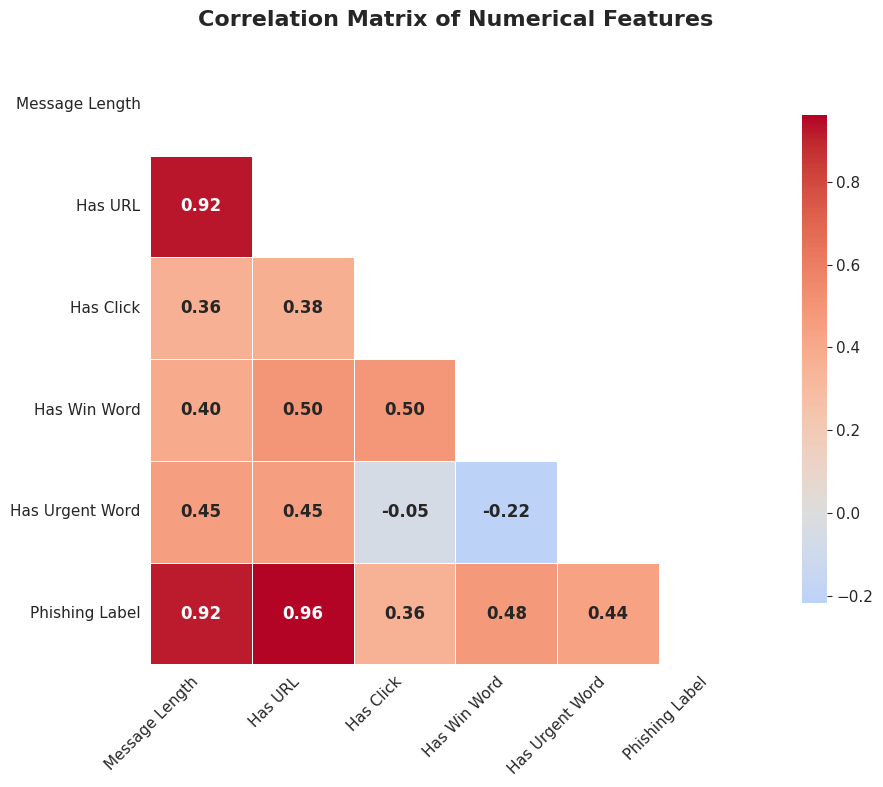

        CORRELATION MATRIX (NUMERICAL FEATURES)
                 Message Length  Has URL  Has Click  Has Win Word  \
Message Length            1.000    0.920      0.364         0.396   
Has URL                   0.920    1.000      0.375         0.497   
Has Click                 0.364    0.375      1.000         0.495   
Has Win Word              0.396    0.497      0.495         1.000   
Has Urgent Word           0.455    0.454     -0.054        -0.217   
Phishing Label            0.918    0.961      0.361         0.478   

                 Has Urgent Word  Phishing Label  
Message Length             0.455           0.918  
Has URL                    0.454           0.961  
Has Click                 -0.054           0.361  
Has Win Word              -0.217           0.478  
Has Urgent Word            1.000           0.437  
Phishing Label             0.437           1.000  

                  STRONG CORRELATIONS (|r| > 0.5)
     Feature 1      Feature 2  Correlation
Phishing Label   

In [ ]:
# Correlation Matrix of Numerical Variables (English Only)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Select numerical features (including binary)
num_features = ['length', 'has_url', 'has_click', 'has_win', 'has_urgent', 'label']
feature_labels = {
    'length': 'Message Length',
    'has_url': 'Has URL',
    'has_click': 'Has Click',
    'has_win': 'Has Win Word',
    'has_urgent': 'Has Urgent Word',
    'label': 'Phishing Label'
}

# Create dataframe
df_num = df[num_features].copy()
df_num = df_num.rename(columns=feature_labels)

# Compute correlation matrix
corr_matrix = df_num.corr(method='pearson')

# Set style
sns.set_style("white")
plt.rcParams['font.size'] = 11
plt.rcParams['figure.figsize'] = (10, 8)

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    square=True,
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'shrink': 0.8},
    annot_kws={'size': 12, 'weight': 'bold'},
    mask=np.triu(corr_matrix)  # Show lower triangle only
)
plt.title("Correlation Matrix of Numerical Features", fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print correlation table
print("="*80)
print("        CORRELATION MATRIX (NUMERICAL FEATURES)")
print("="*80)
print(corr_matrix.round(3))

# Highlight strong correlations
print("\n" + "="*80)
print("                  STRONG CORRELATIONS (|r| > 0.5)")
print("="*80)
strong_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        val = corr_matrix.iloc[i, j]
        if abs(val) > 0.5:
            strong_corr.append({
                'Feature 1': corr_matrix.columns[i],
                'Feature 2': corr_matrix.columns[j],
                'Correlation': val
            })

if strong_corr:
    strong_df = pd.DataFrame(strong_corr).sort_values('Correlation', key=abs, ascending=False)
    print(strong_df.round(3).to_string(index=False))
else:
    print("No strong correlations found (|r| <= 0.5).")

In [ ]:
# STEP 4: Classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.sparse import hstack

# Prepare features
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1,2))
X_text = vectorizer.fit_transform(df['clean_text'])
X_feat = df[['length', 'has_url', 'has_click', 'has_win', 'has_urgent']].values
X = hstack([X_text, X_feat])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SVM
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm)*100:.2f}%")
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb)*100:.2f}%")

print("\n--- SVM Classification Report ---")
print(classification_report(y_test, y_pred_svm, target_names=['Safe', 'Phishing']))

SVM Accuracy: 100.00%
Naive Bayes Accuracy: 93.55%

--- SVM Classification Report ---
              precision    recall  f1-score   support

        Safe       1.00      1.00      1.00        15
    Phishing       1.00      1.00      1.00        16

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



In [ ]:
# STEP 5: Pattern Mining (Apriori) - FIXED & IMPROVED
!pip install mlxtend -q
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# adding keyword from data
keywords = [
    'ক্লিক', 'জিতেছেন', 'ফ্রি', 'জরুরি', 'লক', 'রিসেট', 'হ্যাক', 'অফার', 'পুরস্কার',
    'ক্লেইম', 'আনলক', 'ভেরিফাই', 'পিন', 'ব্যালেন্স', 'টাকা', 'ঢুকেছে'
]

# Create transactions (only phishing)
transactions = []
for text in df[df['label'] == 1]['text']:
    trans = [kw for kw in keywords if kw in text]
    if trans:
        transactions.append(trans)

print(f"Total phishing transactions: {len(transactions)}")

# One-hot encoding
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

# Apriori with LOWER thresholds
frequent_itemsets = apriori(df_trans, min_support=0.05, use_colnames=True)  # 5% = ~4 SMS
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)  # 30%
rules = rules.sort_values(['confidence', 'support'], ascending=[False, False])

print("\nTop Phishing Patterns (Apriori):")
if len(rules) > 0:
    pd.set_option('display.max_colwidth', None)
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))
else:
    print("Still no rules. Try min_support=0.01")

Total phishing transactions: 75

Top Phishing Patterns (Apriori):
         antecedents consequents   support  confidence      lift
4             (আনলক)        (লক)  0.120000    1.000000  7.500000
22           (রিসেট)       (পিন)  0.106667    1.000000  6.818182
38      (ফ্রি, টাকা)     (ক্লিক)  0.080000    1.000000  4.166667
28     (জরুরি, আনলক)        (লক)  0.066667    1.000000  7.500000
29       (জরুরি, লক)      (আনলক)  0.066667    1.000000  8.333333
25      (ফ্রি, অফার)     (ক্লিক)  0.053333    1.000000  4.166667
26     (ক্লিক, অফার)      (ফ্রি)  0.053333    1.000000  5.000000
5               (লক)      (আনলক)  0.120000    0.900000  7.500000
17           (হ্যাক)     (জরুরি)  0.080000    0.857143  4.945055
36  (জিতেছেন, ক্লিক)      (টাকা)  0.053333    0.800000  2.727273


In [ ]:
# STEP 6: HMM for Phishing Word Sequences
!pip install hmmlearn -q
from hmmlearn import hmm
import numpy as np

# Map keywords to states (only from phishing SMS)
state_map = {
    'জরুরি': 0, 'লক': 1, 'আনলক': 2, 'পিন': 3, 'রিসেট': 4,
    'ক্লিক': 5, 'ফ্রি': 6, 'টাকা': 7, 'জিতেছেন': 8
}

sequences = []
lengths = []

for text in df[df['label'] == 1]['text']:
    seq = []
    for word, state in state_map.items():
        if word in text:
            seq.append(state)
    if len(seq) > 1:  # At least 2 keywords
        sequences.append(seq)
        lengths.append(len(seq))

if sequences:
    X = np.array([item for sublist in sequences for item in sublist]).reshape(-1, 1)
    model_hmm = hmm.CategoricalHMM(n_components=4, random_state=42, n_iter=100)
    model_hmm.fit(X, lengths)
    print("HMM Trained! (4 Hidden States)")
    print("Example sequence prediction:")
    sample_seq = np.array([[5, 0, 1]]).T  # ক্লিক → জরুরি → লক
    logprob, state_seq = model_hmm.decode(sample_seq)
    print(f"Log Probability: {logprob:.2f}")
else:
    print("Not enough sequences for HMM.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 kB 6.1 MB/s eta 0:00:00
HMM Trained! (4 Hidden States)
Example sequence prediction:
Log Probability: -15.22


In [ ]:
# STEP 7: CNN Model (Deep Learning)
!pip install tensorflow -q
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize
tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_text'])
X_seq = tokenizer.texts_to_sequences(df['clean_text'])
X_pad = pad_sequences(X_seq, maxlen=60, padding='post', truncating='post')

# Split
from sklearn.model_selection import train_test_split
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(
    X_pad, df['label'], test_size=0.2, random_state=42, stratify=df['label'])

# CNN Model
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(1000, 128, input_length=60),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("Training CNN...")
history = model_cnn.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=16,
                        validation_data=(X_test_cnn, y_test_cnn), verbose=1)

# Evaluate
loss, acc = model_cnn.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print(f"CNN Test Accuracy: {acc*100:.2f}%")

Training CNN...
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.5246 - loss: 0.6953 - val_accuracy: 0.9677 - val_loss: 0.6744
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7786 - loss: 0.6567 - val_accuracy: 0.8710 - val_loss: 0.6363
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8683 - loss: 0.5933 - val_accuracy: 1.0000 - val_loss: 0.5739
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9676 - loss: 0.5111 - val_accuracy: 1.0000 - val_loss: 0.4701
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9834 - loss: 0.3809 - val_accuracy: 1.0000 - val_loss: 0.3260
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9719 - loss: 0.2436 - val_accuracy: 1.0000 - val_loss: 0.1988
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9814 - loss: 0.1560 - val_accuracy: 1.0000 - val_loss: 0.1169
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9670 - loss: 0.1162 - val_accuracy: 1.0000 - val_loss: 0.0813
Epoch 9/10


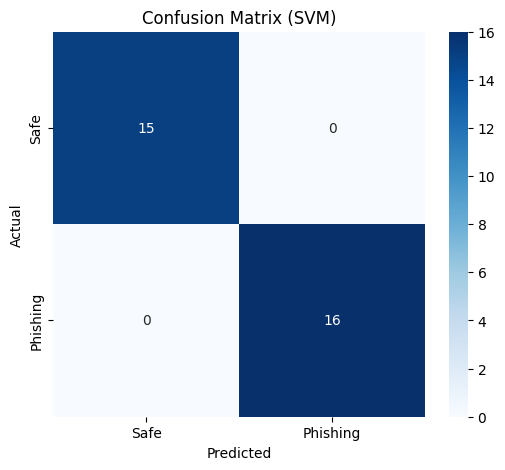


--- Classification Report ---
              precision    recall  f1-score   support

        Safe       1.00      1.00      1.00        15
    Phishing       1.00      1.00      1.00        16

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



In [ ]:
# Confusion Matrix for SVM
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test set
y_pred = svm.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Safe', 'Phishing'], yticklabels=['Safe', 'Phishing'])
plt.title("Confusion Matrix (SVM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['Safe', 'Phishing']))

In [ ]:
# BEST SOLUTION: Use cloudflared (No password, No errors, Stable)
!pkill -f streamlit
!pkill -f cloudflared

# Start Streamlit
!streamlit run app.py &> streamlit.log &

# Install cloudflared
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64 -O cloudflared
!chmod +x cloudflared

# Create tunnel
!nohup ./cloudflared tunnel --url http://localhost:8501 > cloudflared.log 2>&1 &

print("Waiting for tunnel...")
import time
time.sleep(10)

# Show URL
!grep -o 'https://.*\.trycloudflare\.com' cloudflared.log | head -n 1

--2025-10-29 07:19:34--  https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/cloudflare/cloudflared/releases/download/2025.10.0/cloudflared-linux-amd64 [following]
--2025-10-29 07:19:35--  https://github.com/cloudflare/cloudflared/releases/download/2025.10.0/cloudflared-linux-amd64
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/106867604/3cf4ee00-005b-4d19-8b1e-15145bd129bf?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-10-29T08%3A16%3A14Z&rscd=attachment%3B+filename%3Dcloudflared-linux-amd64&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-10-29

Live Demo Link (Streamlit App)
URL: https://gst-nothing-smoke-pushed.trycloudflare.com

Note: JavaScript must be enabled to run the app.
Access: Open in a modern browser (Chrome/Firefox recommended).

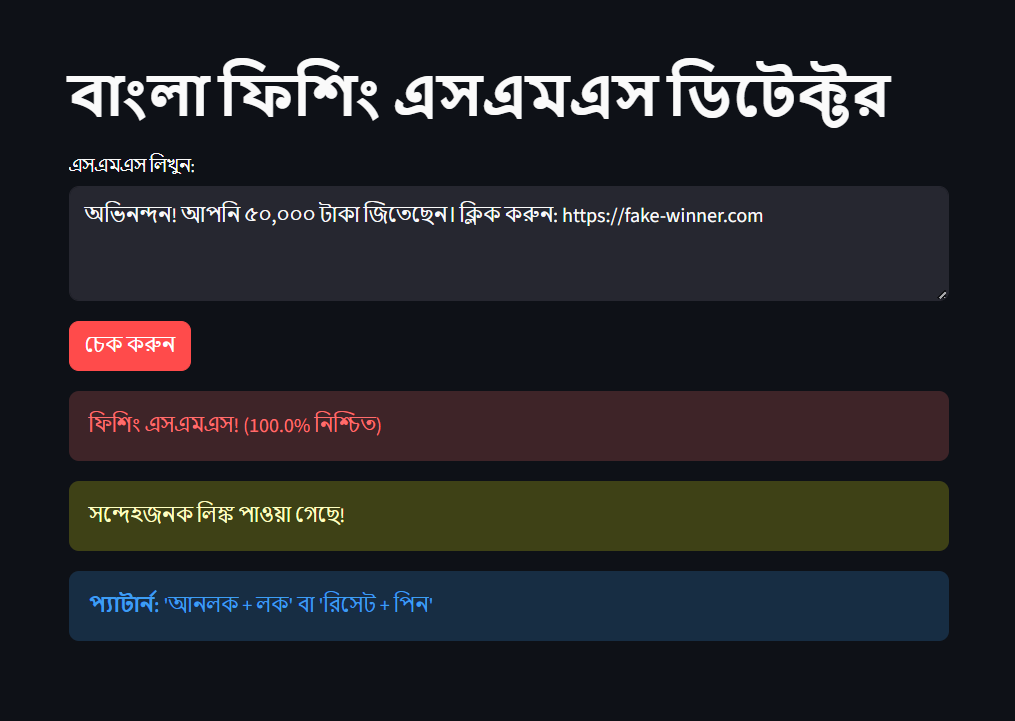

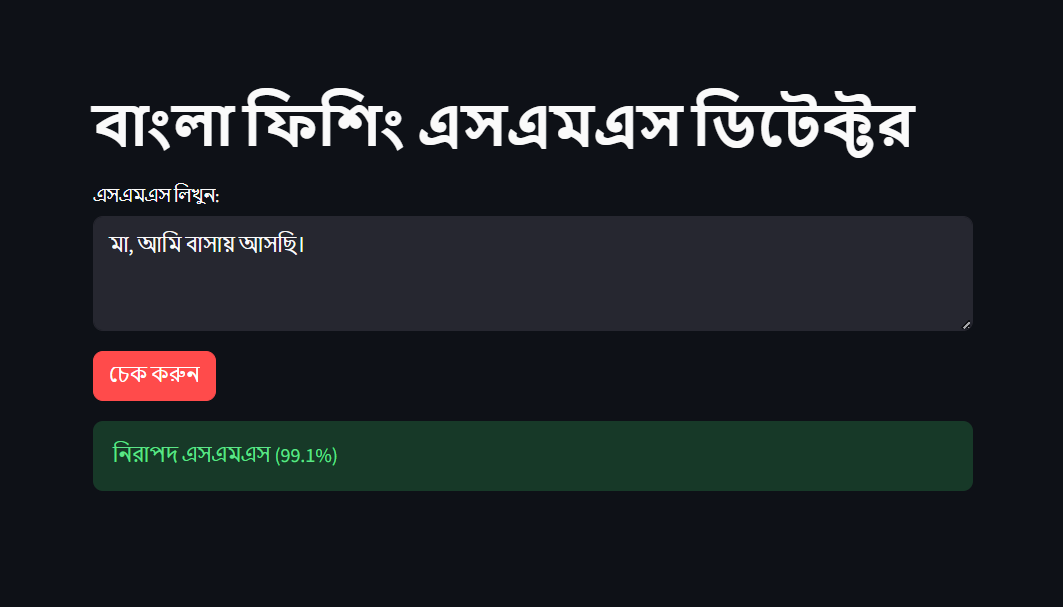